In [18]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emoji
import re

# Renaming of files

In [2]:
# Path to the folder containing CSV files
folder_path = 'Datatest'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate through each CSV file and rename them
for index, csv_file in enumerate(csv_files, start=1):
    # Generate the new file name
    new_file_name = f'subject_{index}.csv'
    # Build the full path to the CSV file
    old_file_path = os.path.join(folder_path, csv_file)
    new_file_path = os.path.join(folder_path, new_file_name)
    # Rename the file
    os.rename(old_file_path, new_file_path)
    print(f'Renamed {csv_file} to {new_file_name}')

Renamed subject_1.csv to subject_1.csv


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Datatest\\subject_10.csv' -> 'Datatest\\subject_2.csv'

# Making the name of coloumn uniform

In [3]:
for i in range(1, 75):
    df = pd.read_csv(f'Datatest/subject_{i}.csv')
    
    # If a column is called "WRITING.TEXT", rename it to "WRITING.TEXT.Element:Text"
    if "WRITING.TEXT" in df.columns:
        df.rename(columns={"WRITING.TEXT": "WRITING.TEXT.Element:Text"}, inplace=True)
        df.to_csv(f'Datatest/subject_{i}.csv', index=False)  # Save the modified DataFrame
        print(f"Renamed 'WRITING.TEXT' to 'WRITING.TEXT.Element:Text' in subject_{i}.csv")
    else:
        print(f"No 'WRITING.TEXT' column found in subject_{i}.csv")

No 'WRITING.TEXT' column found in subject_1.csv
No 'WRITING.TEXT' column found in subject_2.csv
No 'WRITING.TEXT' column found in subject_3.csv
No 'WRITING.TEXT' column found in subject_4.csv
No 'WRITING.TEXT' column found in subject_5.csv
No 'WRITING.TEXT' column found in subject_6.csv
No 'WRITING.TEXT' column found in subject_7.csv
No 'WRITING.TEXT' column found in subject_8.csv
No 'WRITING.TEXT' column found in subject_9.csv
No 'WRITING.TEXT' column found in subject_10.csv
No 'WRITING.TEXT' column found in subject_11.csv
No 'WRITING.TEXT' column found in subject_12.csv
No 'WRITING.TEXT' column found in subject_13.csv
No 'WRITING.TEXT' column found in subject_14.csv
No 'WRITING.TEXT' column found in subject_15.csv
No 'WRITING.TEXT' column found in subject_16.csv
No 'WRITING.TEXT' column found in subject_17.csv
No 'WRITING.TEXT' column found in subject_18.csv
No 'WRITING.TEXT' column found in subject_19.csv
No 'WRITING.TEXT' column found in subject_20.csv
No 'WRITING.TEXT' column foun

In [8]:
df = pd.read_csv('Datatest/subject_53.csv')
df.columns

Index(['ID', 'WRITING.TITLE', 'WRITING.DATE', 'WRITING.INFO',
       'WRITING.TEXT.Element:Text'],
      dtype='object')

In [9]:
df.head()

,ID,WRITING.TITLE,WRITING.DATE,WRITING.INFO,WRITING.TEXT.Element:Text
0,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:12',reddit post,b'Yeah'
1,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:05',reddit post,b'Ok thanks \xf0\x9f\x99\x8c'
2,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:30:14',reddit post,b'It\xe2\x80\x99s not the it\xe2\x80\x99s sti...
3,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:23:03',reddit post,b'Give me one of your worsts then'
4,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:18:47',reddit post,b'\xf0\x9f\x98\xad'


# Removing the b and first and last apostrophes

In [11]:
df.describe()

,ID,WRITING.TITLE,WRITING.DATE,WRITING.INFO,WRITING.TEXT.Element:Text
count,875,875,875,875,875
unique,1,22,875,1,838
top,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:12',reddit post,b'Real'
freq,875,854,1,875,10


In [12]:
for index, row in df.iterrows():

    text_value = row['WRITING.TEXT.Element:Text']
    if isinstance(text_value, str) and text_value[0] == ' ' and text_value[1] == 'b' and text_value[2] == "'" and text_value[-1] == ' ' and text_value[-2] == "'":
        df.at[index, 'WRITING.TEXT.Element:Text'] = text_value[3:-2]
        #print the new value at that index
        print(df.at[index, 'WRITING.TEXT.Element:Text'])
        
    elif isinstance(text_value, float) and np.isnan(text_value):
        # Handle NaN values if needed
        pass

Yeah
Ok thanks \xf0\x9f\x99\x8c
It\xe2\x80\x99s not the it\xe2\x80\x99s still dark
Give me one of your worsts then
\xf0\x9f\x98\xad
Your ass too vanilla anyways
I\xe2\x80\x99m really really bored
Cause I\xe2\x80\x99m God
Sure
It\xe2\x80\x99s been up \xf0\x9f\x98\xad
I\xe2\x80\x99m 19 do it
Very
In due time brother, in due time \xf0\x9f\x98\x8c
U really do
Making a post about u
It was a joke jeez
Ouch \xf0\x9f\x98\xad
Like spare a whore a dollar will ya \xf0\x9f\x98\x95
Thanks \xf0\x9f\xa5\xb0
My What-The-Fuck-O-Meter\n\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\xe2\x80\x94\n\n-Jeffery Dahmer wasn\xe2\x80\x99t as bad as u\n\n-Honestly you deserve to be locked up\n\n-EW \n\n-Bitch clear your cache and history jesus\n\n-Not VPN worthy but ew\n\n-That\xe2\x80\x99s like what old people find obscene\n\n-My dog likes worse shit\n\n-Bitch that\xe2\x80\x99s no

# Removing unicode characters

In [30]:
# for index, row in df.iterrows():

#     text_value = row['WRITING.TEXT.Element:Text']

#    # print (text_value)
#     # if the string contains a substr of \xe2\x80\x99 replace it with '

#     if isinstance(text_value, str):
#         if '\\xe2\\x80\\x99' in text_value:
#             print(text_value.count('\\xe2\\x80\\x99'))
        
#     elif isinstance(text_value, float) and np.isnan(text_value):
#         # Handle NaN values if needed
#         pass

New Code to clean the data

In [13]:

# Assuming 'WRITING.TEXT.Element:Text' is a column in your DataFrame 'df'
for index, row in df.iterrows():
    text_value = row['WRITING.TEXT.Element:Text']

    if isinstance(text_value, str):
        # Replace specific substrings
        text_value = text_value.replace('\\xe2\\x80\\x99', "'")
        text_value = text_value.replace('\\xe2\\x80\\x94', "-")
        text_value = text_value.replace('\\n', " ")

        # Define the regular expression pattern to match words starting with \xf0\x9f
        pattern = r'\\xf0\\x9f\S*'
        # Replace matched words with a single space
        text_value = re.sub(pattern, ' ', text_value)

        # Update the DataFrame with the replaced text
        df.at[index, 'WRITING.TEXT.Element:Text'] = text_value

    elif isinstance(text_value, float) and np.isnan(text_value):
        # Handle NaN values if needed
        pass

    print(df.at[index, 'WRITING.TEXT.Element:Text'])

Yeah
Ok thanks  
It's not the it's still dark
Give me one of your worsts then
 
Your ass too vanilla anyways
I'm really really bored
Cause I'm God
Sure
It's been up  
I'm 19 do it
Very
In due time brother, in due time  
U really do
Making a post about u
It was a joke jeez
Ouch  
Like spare a whore a dollar will ya  
Thanks  
My What-The-Fuck-O-Meter ----------------  -Jeffery Dahmer wasn't as bad as u  -Honestly you deserve to be locked up  -EW   -Bitch clear your cache and history jesus  -Not VPN worthy but ew  -That's like what old people find obscene  -My dog likes worse shit  -Bitch that's nothing
Expecting so much hate for revealing my true self
It was like a milisecond reaction too like help
Well good luck cause you're too young for me
Call me Lisa Rowe  
Think if something that makes u sad or maybe watch a sad movie or yt video
Do it
 
Ikr  
What makes u so sure  
My mom when I burned the house down cause my sugar daddy found a new whore

Ffs that's just horrible I'm so sorry
To

In [14]:
#pip install emoji

   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
    --------------------------------------- 10.2/421.5 kB ? eta -:--:--
   ------- -------------------------------- 81.9/421.5 kB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 122.9/421.5 kB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 204.8/421.5 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 225.3/421.5 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 245.8/421.5 kB 1.0 MB/s eta 0:00:01
   -------------------------------- ------- 337.9/421.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 358.4/421.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 421.5/421.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Code to convert emoji to text

In [16]:
# convert all emojis to text
for index, row in df.iterrows():
    text_value = row['WRITING.TEXT.Element:Text']
    if isinstance(text_value, str):
        text_value = emoji.demojize(text_value)
        df.at[index, 'WRITING.TEXT.Element:Text'] = text_value
    elif isinstance(text_value, float) and np.isnan(text_value):
        # Handle NaN values if needed
        pass

    print(df.at[index, 'WRITING.TEXT.Element:Text'])

Yeah
Ok thanks  
It's not the it's still dark
Give me one of your worsts then
 
Your ass too vanilla anyways
I'm really really bored
Cause I'm God
Sure
It's been up  
I'm 19 do it
Very
In due time brother, in due time  
U really do
Making a post about u
It was a joke jeez
Ouch  
Like spare a whore a dollar will ya  
Thanks  
My What-The-Fuck-O-Meter ----------------  -Jeffery Dahmer wasn't as bad as u  -Honestly you deserve to be locked up  -EW   -Bitch clear your cache and history jesus  -Not VPN worthy but ew  -That's like what old people find obscene  -My dog likes worse shit  -Bitch that's nothing
Expecting so much hate for revealing my true self
It was like a milisecond reaction too like help
Well good luck cause you're too young for me
Call me Lisa Rowe  
Think if something that makes u sad or maybe watch a sad movie or yt video
Do it
 
Ikr  
What makes u so sure  
My mom when I burned the house down cause my sugar daddy found a new whore

Ffs that's just horrible I'm so sorry
To

In [17]:
#pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.0 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.0 kB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/300.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


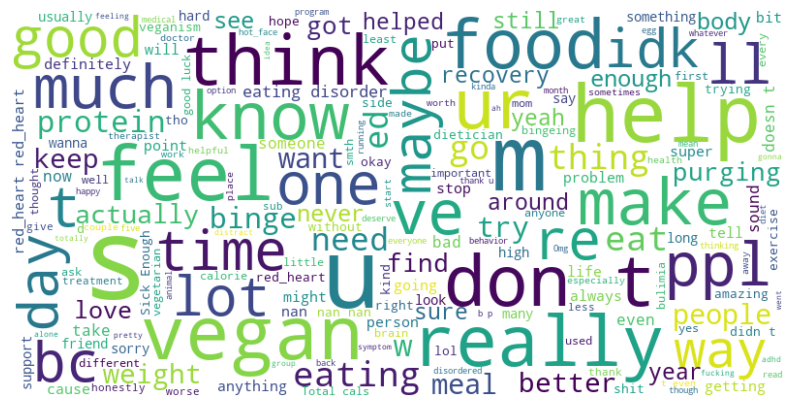

In [38]:
from wordcloud import WordCloud

# Assuming 'WRITING.TEXT.Element:Text' is a column in your DataFrame 'df'
text = ' '.join(df['WRITING.TEXT.Element:Text'].astype(str))

# Create a WordCloud object with adjusted parameters
wordcloud = WordCloud(width=800, height=400, max_font_size=120, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the Word Cloud as an image
plt.savefig('wordcloud.png')

plt.show()


In [19]:
# tell me the coloumn names in the csv file
df.head()

,ID,WRITING.TITLE,WRITING.DATE,WRITING.INFO,WRITING.TEXT.Element:Text
0,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:12',reddit post,Yeah
1,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:05',reddit post,Ok thanks
2,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:30:14',reddit post,It's not the it's still dark
3,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:23:03',reddit post,Give me one of your worsts then
4,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:18:47',reddit post,


In [20]:
df

,ID,WRITING.TITLE,WRITING.DATE,WRITING.INFO,WRITING.TEXT.Element:Text
0,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:12',reddit post,Yeah
1,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:32:05',reddit post,Ok thanks
2,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:30:14',reddit post,It's not the it's still dark
3,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:23:03',reddit post,Give me one of your worsts then
4,eRisk2023-T3_Subject31,b' ',b'2022-10-18 15:18:47',reddit post,
...,...,...,...,...,...
870,eRisk2023-T3_Subject31,b' ',b'2022-10-12 11:02:42',reddit post,WHY DID U TURN OFF MY AUTO BREATHING
871,eRisk2023-T3_Subject31,b' ',b'2022-10-12 11:02:19',reddit post,Ur life has barely started like u don't know s...
872,eRisk2023-T3_Subject31,b' ',b'2022-10-12 10:57:14',reddit post,I dont
873,eRisk2023-T3_Subject31,b' ',b'2022-10-12 10:56:37',reddit post,Bitch what


In [55]:
df1 = pd.read_csv('Data Final\eRisk2022-T3_Subject5.csv')
df1

,ID,WRITING.TITLE.Element:Text,WRITING.DATE,WRITING.INFO,WRITING.TEXT.Element:Text
0,eRisk2022-T3_Subject5,NaN,2021-11-21 21:08:25,reddit post,I’m my experience they have. I’ve owned both ...
1,eRisk2022-T3_Subject5,NaN,2021-11-21 07:49:15,reddit post,"So different from other people here, I’d say ..."
2,eRisk2022-T3_Subject5,NaN,2021-11-20 01:38:03,reddit post,Did you put onion in it too? It looks like on...
3,eRisk2022-T3_Subject5,NaN,2021-11-17 21:39:20,reddit post,I’d cook down juice until it’s syrupy then ad...
4,eRisk2022-T3_Subject5,NaN,2021-11-08 04:23:57,reddit post,She’s Not There by Jennifer Boylan is a good ...
...,...,...,...,...,...
1032,eRisk2022-T3_Subject5,Cyanide and Happiness #3403,2013-12-17 16:31:58,reddit post,NaN
1033,eRisk2022-T3_Subject5,Pet Peeve,2013-12-17 05:10:08,reddit post,NaN
1034,eRisk2022-T3_Subject5,Pet Peeve,2013-12-16 07:47:29,reddit post,NaN
1035,eRisk2022-T3_Subject5,#2010 that's one way to propose...,2013-11-26 20:53:42,reddit post,NaN
